Pattern_Recognition_Report  
Name: JU YAN 鞠岩  
Student ID Number: 6930-35-3722

# 1. Explanation of the data
White wines are popular all over the world, but their quality varies. I will use the attributes in this dataset to build a model to predict the quality of other white wines. The dataset come from UCI machine learning repository (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv). The goal is to model wine quality based on physicochemical tests and predict quality of other wines and future one. 

The feature can be summarized as followings:   
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
12 - quality (score between 0 and 10) : This one is that we need to predict by using the model which we will build.

# 2. Preprocessing data
In this dataset, we have 4898 instances and 12 attributes. Firstly, we need to load the data from '.csv' file and then split 12 features into independent(X) and dependent(y) variables. Quality is the dependent variable, and the rest are independent variables. At last, we split the dataset into two set(train set and test set) and 20 percent of the data belongs to the test set and rest of the data belongs to the train set. Therefore, we will get 3918 instances in train set and 980 instances in test set.

In [ ]:

import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
data_set = ps.read_csv('winequality-white.csv',sep=';')
df = ps.DataFrame(data_set)
X = df.iloc[:,:-1].values #independent values
y = df.iloc[:,11].values #dependent values
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42) #split the Dataset into two parts:80% are training data,20% are test data
print(X_train)
print(X_test)
print(y_train)
print(y_test)

# 3. Implement and apply regression
## 3.1. Linear Regression
### 3.1.1. Introduction
We need to obtain a certain linear relationship between the independent variable and the dependent variable through the data set, so as to establish a linear model to predict future data. 

$$f(\mathbf x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + \dots + w_{11}x_{11}== \mathbf w^T \mathbf x$$

Also we can use a vector $$\mathbf w = (w_0, w_1, w_2, w_3, \dots, w_{11})$$ to represent it as: 

$$\mathbf y  =  X \mathbf w$$

where $$\mathbf x = (1, x_1, x_2, x_3, \dots, x_{11})$$
$$\mathbf y = (y_1, y_2, y_3, \dots, y_N)$$
$$ X = [\mathbf x_1, \mathbf x_2, \mathbf x_3, \dots, \mathbf x_N]^T= \begin{pmatrix}
               1&x_{1,1}&x_{1,2}&x_{1,3}&\cdots&x_{1,11}\\
               1&x_{2,1}&x_{2,2}&x_{2,3}&\cdots&x_{2,11}\\
               1&x_{3,1}&x_{3,2}&x_{3,3}&\cdots&x_{3,11}\\
               \vdots&\vdots& \vdots&\vdots&\ddots&\vdots\\
               1&x_{N,1}&x_{N,2}&x_{N,3}&\cdots&x_{N,11}\\
               \end{pmatrix}$$


Then we need to minimize the value of loss function
$$L(\mathbf w) = \sum_{i=1}^N(y_i - \mathbf w^T \mathbf x_i)^2 = ||\mathbf y-X\mathbf w||_2^2 = (\mathbf y - X\mathbf w)^T(\mathbf y - X\mathbf w)$$
$$\mathbf w^* = arg\,\min_{\mathbf w}L(\mathbf w)$$
We can solve for w by taking the derivative of L and making it equal to zero:
$$\frac{\partial L}{\partial \mathbf w}=\frac{\partial ((\mathbf y - X\mathbf w)^T(\mathbf y - X\mathbf w))}{\partial \mathbf w}=2X^T(X\mathbf w - \mathbf y )=\mathbf 0$$
Then $$\mathbf w^* = (X^TX)^{-1}X^T\mathbf y$$
Finally, bring w back into the original formula and we can get a linear model and use it to predict the quality of white wine in the future.
$$f(\mathbf x)=\mathbf x^T(X^TX)^{-1}X^T\mathbf y$$


### 3.1.2. Train

In [ ]:
M_train = np.array(X_train)
M_train= np.insert(M_train,0,values=1,axis=1) #Design Matrix
y_train = np.array(y_train)
w_best = np.dot((np.dot((np.linalg.inv(np.dot(M_train.T,M_train))),M_train.T)),y_train) #calculate the inverse and transpose of matrix and the value of w

print(w_best)


### 3.1.3 Predict results

In [ ]:
M_test = np.array(X_test)
M_test = np.insert(M_test,0,values=1,axis=1)
y_test = np.array(y_test)
Predict_result = np.dot(M_test,w_best)
print("MSE of the test set by using this model is ", mean_squared_error(y_test,Predict_result) )

In [ ]:
error = Predict_result - y_test #the error between predict result and fact result
n=list(range(y_test.shape[0]))
plt.scatter(n,error, facecolor='purple', edgecolor='k', alpha=0.5,s=80)
plt.hlines(y=0, xmin=0,xmax=1000,lw=2,color='red')
plt.xlim([-1,1000])
plt.xlabel('Number of test datasets')
plt.ylabel('error')
plt.show()

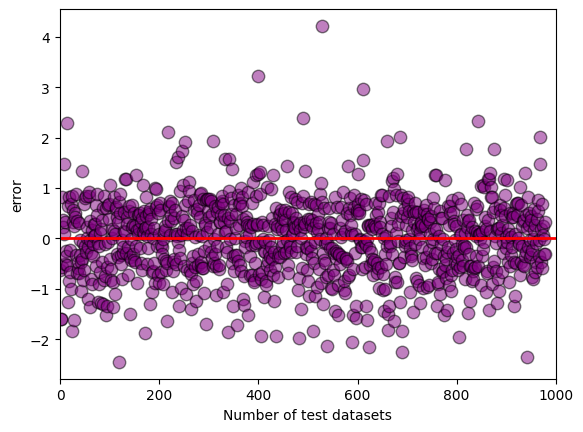

## 3.2 Ridge regression
### 3.2.1 Introduction
From Linear regression we know that we need to calculate the value of $ \mathbf (X^TX)^{-1} $.
But if the matrix is singular, it cannot be solved. Even if the column $ X $ is full rank, when there is collinearity in the data features, the standard least squares solution will be unstable, and the determinant of $ X^TX $ is close to zero, and the error will be large when calculating $ X^TX $. Therefore, we need to add a penalty on loss function:
$$L(\mathbf w) = \sum_{i=1}^N(y_i - \mathbf w^T \mathbf x_i)^2 + \lambda \sum_{i=1}^M \mathbf w_i^2 $$
Then we will get a new value of $ \mathbf w $:
$$\mathbf w^* = (X^TX+\lambda I)^{-1}X^T\mathbf y$$


### 3.2.2 Training

In [ ]:

m = (np.dot(M_train.T,M_train)).shape[0]
I = np.identity(m)
lambd = 0.01
w_ridge = np.dot((np.dot((np.linalg.inv(np.dot(M_train.T,M_train)+lambd*I)),M_train.T)),y_train)
print(w_ridge)
Ridge_result = np.dot(M_test,w_ridge)
print("MSE of the test set by using this model is ", mean_squared_error(y_test,Ridge_result) )

### 3.2.3 Predict result


In [ ]:
error_ridge = Ridge_result - y_test
n=list(range(y_test.shape[0]))
plt.scatter(n,error_ridge, facecolor='green', edgecolor='k', alpha=0.5,s=80)
plt.hlines(y=0, xmin=0,xmax=1000,lw=2,color='red')
plt.xlim([-1,1000])
plt.xlabel('Number of test datasets')
plt.ylabel('error')
plt.show()

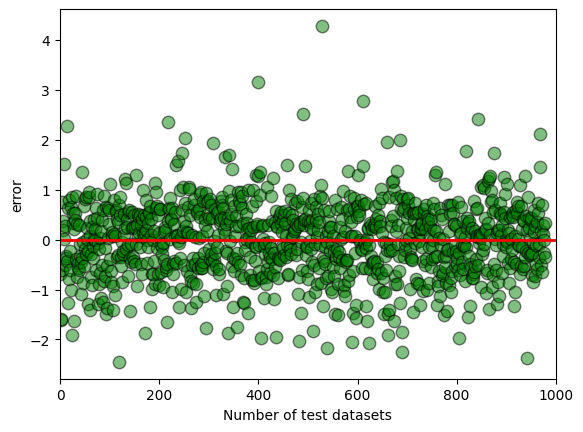

# 4. Conclusion

By using Linear regression and ridge regression methods, we can know that Linear regression and Ridge regression both performance well. However, the error of ridge regression will be less.(you also can see it from the following graph). Anyway, we can use thses two models to predict the quality of white wine accurately. In this case, this model can help producers to know the quality in advance and reduce the cost of producing white wine.

In [ ]:
plt.scatter(n,error, facecolor='yellow', edgecolor='k', alpha=0.8, label = 'LR')
plt.scatter(n,error_ridge, facecolor='green', edgecolor='k', alpha=0.8, label = 'RR')
plt.hlines(y=0, xmin=0,xmax=300,lw=2,color='red')
plt.xlim([-1,300])
plt.xlabel('Number of test datasets')
plt.ylabel('error')
plt.legend(fontsize=15)

plt.show()

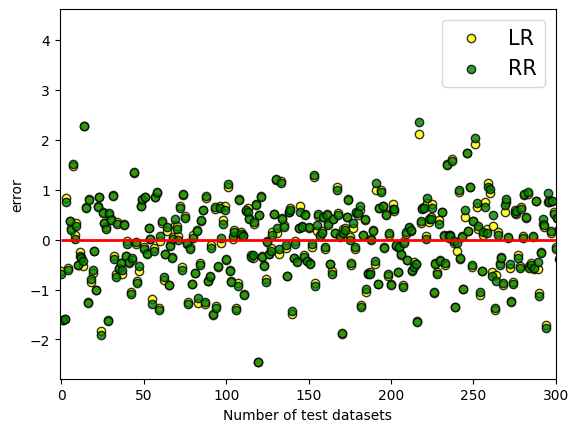